In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [2]:
# base_model = VGG16(weights='imagenet', include_top=False)
# base_model.trainable=False
# base_model.summary()

In [3]:
from tensorflow.keras.models import load_model
base_model = load_model('final_feature.h5')
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
feature_extractor_model = Model(inputs=base_model.input, outputs=[base_model.get_layer('block1_conv2').output,
                                                                    base_model.get_layer('block2_conv2').output,
                                                                    base_model.get_layer('block3_conv3').output,
                                                                    base_model.get_layer('block4_conv3').output,
                                                                    base_model.get_layer('block5_conv2').output])

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
cifar = tf.keras.datasets.cifar10
(x_train, _), (x_test, _) = cifar.load_data()

In [6]:
image1 = x_train[5]
image2 = x_train[8]

array1 = np.array(image1)
array2 = np.array(image2)

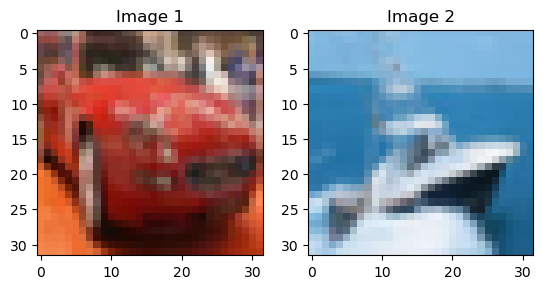

In [7]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[1].imshow(image2)
axes[1].set_title('Image 2')
plt.show()

In [8]:
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

In [9]:
# features_image1 = feature_extractor_model.predict(image1)
# features_image2 = feature_extractor_model.predict(image2)

In [10]:
# features_image1[0].shape

In [11]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
class Model:
    def __init__(self,model):
        self.model=model
    def show(self):
        path_cm = './confusion_matrix.png'
        cm = Image.open(path_cm)
        print("Model Evaluation Metrics:")
        display(cm)
        path_results = './result_model.png'
        results = Image.open(path_results)
        print("\nThis model was fine-tuned(VGG16) on Architectural Heritage Elements data.")
        print("Trained on 3000 images across 10 classes.")
        print("******************")
        print("Results on testing data:")
        display(results)


In [13]:
class KL_LOSS:
    def _init__(self):
        self.p=None
        self.q=None
    def hist(self,f1,f2):
        print("Finding Probability Distribution of Features.")
        self.p, _ = np.histogram(f1, bins=256, range=(0, 256), density=True)
        self.q, _ = np.histogram(f2, bins=256, range=(0, 256), density=True)
        self.p = self.p[:256]
        self.q = self.q[:256]
        x_range = np.arange(256)
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes[0, 0].plot(x_range, self.p, color='blue')
        axes[0, 0].set_title('Density of hist1')
        axes[0, 0].set_xlabel('Pixel Value')
        axes[0, 0].set_ylabel('Density')

        axes[0, 1].hist(np.arange(256), bins=256, weights=self.p, color='blue')
        axes[0, 1].set_title('Histogram of hist1')
        axes[0, 1].set_xlabel('Pixel Value')
        axes[0, 1].set_ylabel('Frequency')

        axes[1, 0].plot(x_range, self.q, color='red')
        axes[1, 0].set_title('Density of hist2')

        axes[1, 0].set_xlabel('Pixel Value')
        axes[1, 0].set_ylabel('Density')

        axes[1, 1].hist(np.arange(256), bins=256, weights=self.q, color='red')
        axes[1, 1].set_title('Histogram of hist2')
        axes[1, 1].set_xlabel('Pixel Value')
        axes[1, 1].set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()
        print("Done.")
        
        
    def kl_Loss(self,epsilon=1e-10):
        try:
            print("Finding KL Loss.")
            p=self.p
            q=self.q
            pq=sum(p[i] * log2((p[i] + epsilon) / (q[i] + epsilon)) for i in range(len(p)))
            qp=sum(q[i] * log2((q[i] + epsilon) / (p[i] + epsilon)) for i in range(len(q)))
            p='image1'
            q='imag2'
            print(" {},differs from another distribution, {}: {}\n\n".format(p,q,pq))
            print(" {},differs from another distribution, {}: {}\n\n".format(q,p,qp))
            print("KL Loss:",(pq+qp))
        except Exception as e:
            print("First call function hist.")
            print(e)
        

In [23]:
class ContentLoss(Model,KL_LOSS):
    def __init__(self,imag1,image2,model):
        self.model=model
        super().__init__(self.model)
        self.image1=image1
        self.image2=image2
        self.__list_fm1=None
        self.__list_fm2=None
        self.euclidean=[]
        self.cosine=[]
        self.contentloss=[]
        self.kl_loss = KL_LOSS()
        
    def preprocess(self):
        array1 = np.array(self.image1)
        array2 = np.array(self.image2)
        fig, axes = plt.subplots(1, 2)
        axes[0].imshow(image1)
        axes[0].set_title('Image 1')
        axes[1].imshow(image2)
        axes[1].set_title('Image 2')
        plt.show()
        
    def generate_features(self):
        image1 = np.expand_dims(self.image1, axis=0)
        image2 = np.expand_dims(self.image2, axis=0)
        self.__list_fm1 = self.model.predict(image1)
        self.__list_fm2 = self.model.predict(image2)
        print("done.")
        
        
    def sim_euc(self):
        for i in range(len(self.__list_fm1)):
            flat_features_image1 = self.__list_fm1[i].flatten()
            flat_features_image2 = self.__list_fm2[i].flatten()
            euclidean_distance = euclidean_distances([flat_features_image1], [flat_features_image2])
            cosine_similarity_score = cosine_similarity([flat_features_image1], [flat_features_image2])
            self.euclidean.append(euclidean_distance)
            self.cosine.append(cosine_similarity_score)
        print("done.")
            
    def Contentloss(self):
        print("inform:........preprocessing  image")
        self.preprocess()
        print("Inform:........Finding features map of 2 given images.")
        self.generate_features()
        print("Done..\n")
        print("Finding distance.......")
        self.sim_euc()
        print("Finding Content loss.............\n")
        print("**********************************")
        for i in range(len(self.euclidean)):
            print(f"Euclidean Distance for feature map {i+1}: {self.euclidean[i]}")
            print(f"Cosine Similarity for feature map {i+1}: {self.cosine[i]}\n")
            print("****************************************************************")
        print("************************************")
        print("content loss: Giving 100 times to 5th and 10 times to 4th...",100*self.euclidean[4]+10*self.euclidean[3])
    
    def kl(self):
        self.kl_loss.hist(self.__list_fm1[4],self.__list_fm2[4])
#         self.kl_loss.hist(self.image1,self.image2)
        self.kl_loss.kl_Loss()
    
        

In [24]:
image1 = x_train[9]
image2 = x_train[24]

In [25]:
from PIL import Image
from math import log2
path1='./n03445777_14051.JPEG'
path2='./n03445777_4061.JPEG'
image1 = Image.open(path1)
image1=image1.resize((320,320))
image2=Image.open(path2)
image2=image2.resize((320,320))

In [26]:
cl=ContentLoss(image1,image2,feature_extractor_model)

inform:........preprocessing  image


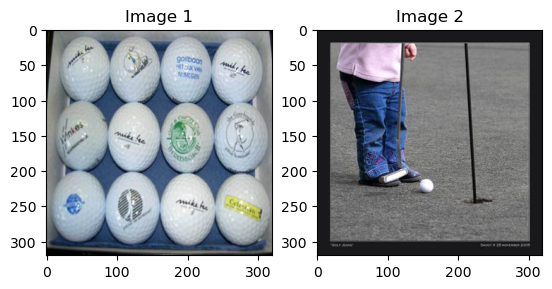

Inform:........Finding features map of 2 given images.
1/1 [==============================] - 1s 1s/step
done.
Done..

Finding distance.......
done.
Finding Content loss.............

**********************************
Euclidean Distance for feature map 1: [[504683.34]]
Cosine Similarity for feature map 1: [[0.7624757]]

****************************************************************
Euclidean Distance for feature map 2: [[947130.5]]
Cosine Similarity for feature map 2: [[0.32324532]]

****************************************************************
Euclidean Distance for feature map 3: [[826737.2]]
Cosine Similarity for feature map 3: [[0.14929369]]

****************************************************************
Euclidean Distance for feature map 4: [[134344.28]]
Cosine Similarity for feature map 4: [[0.08014964]]

****************************************************************
Euclidean Distance for feature map 5: [[25583.512]]
Cosine Similarity for feature map 5: [[0.11153069]]


In [27]:
cl.Contentloss()

Finding Probability Distribution of Features.


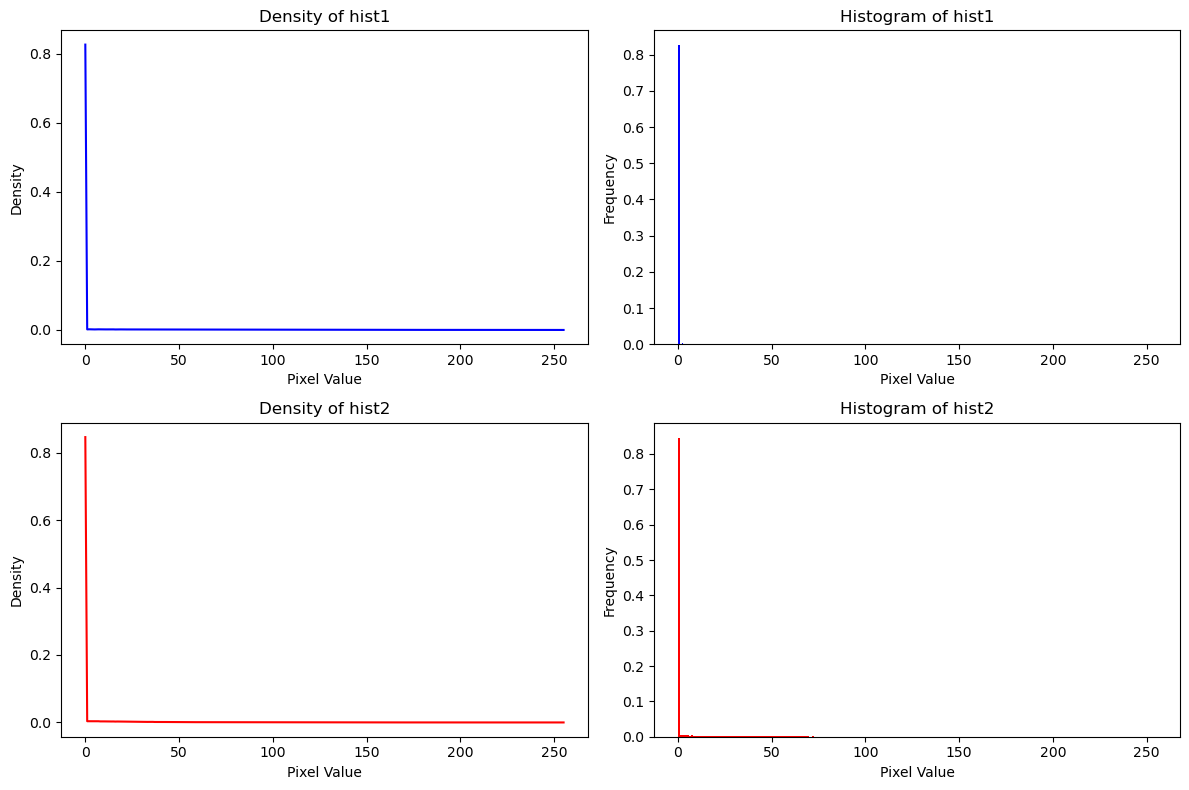

Done.
Finding KL Loss.
 image1,differs from another distribution, imag2: 0.08673169018685635


 imag2,differs from another distribution, image1: 0.05322148028257135


KL Loss: 0.1399531704694277


In [28]:
cl.kl()

inform:........preprocessing  image


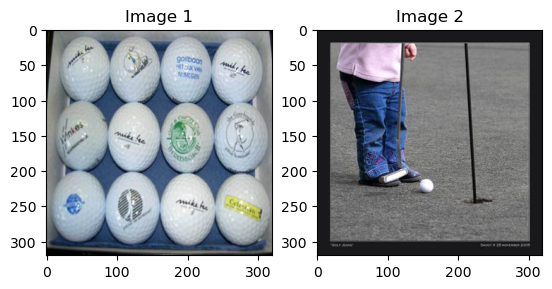

Inform:........Finding features map of 2 given images.
1/1 [==============================] - 2s 2s/step
done.
Done..

Finding distance.......
done.
Finding Content loss.............

**********************************
Euclidean Distance for feature map 1: [[0.]]
Cosine Similarity for feature map 1: [[0.99993265]]

****************************************************************
Euclidean Distance for feature map 2: [[0.]]
Cosine Similarity for feature map 2: [[0.9999899]]

****************************************************************
Euclidean Distance for feature map 3: [[0.]]
Cosine Similarity for feature map 3: [[0.999999]]

****************************************************************
Euclidean Distance for feature map 4: [[0.]]
Cosine Similarity for feature map 4: [[1.0000002]]

****************************************************************
Euclidean Distance for feature map 5: [[0.]]
Cosine Similarity for feature map 5: [[1.0000002]]

************************************

In [30]:
# image1 = x_train[9]
# image2 = x_train[9]
cl=ContentLoss(image1,image1,feature_extractor_model)
cl.Contentloss()

Model Evaluation Metrics:


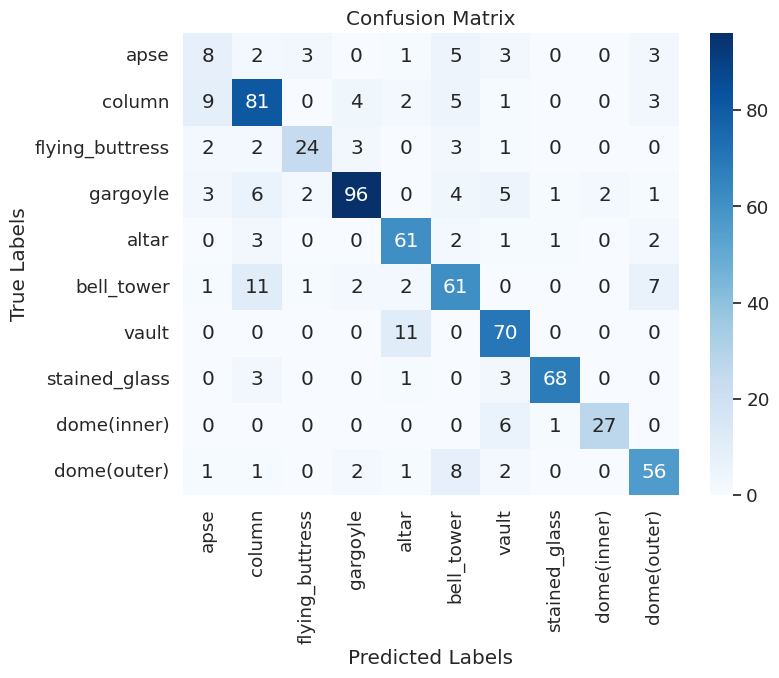


This model was fine-tuned(VGG16) on Architectural Heritage Elements data.
Trained on 3000 images across 10 classes.
******************
Results on testing data:


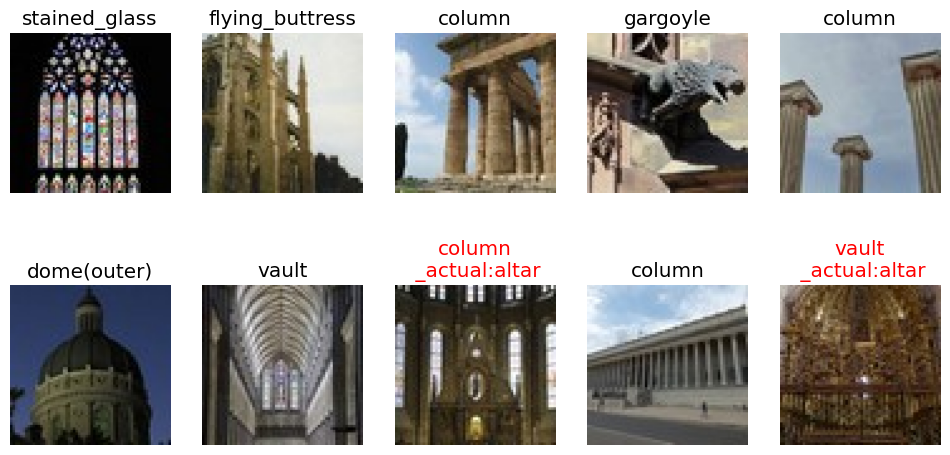

In [21]:
cl.show()

Finding Probability Distribution of Features.


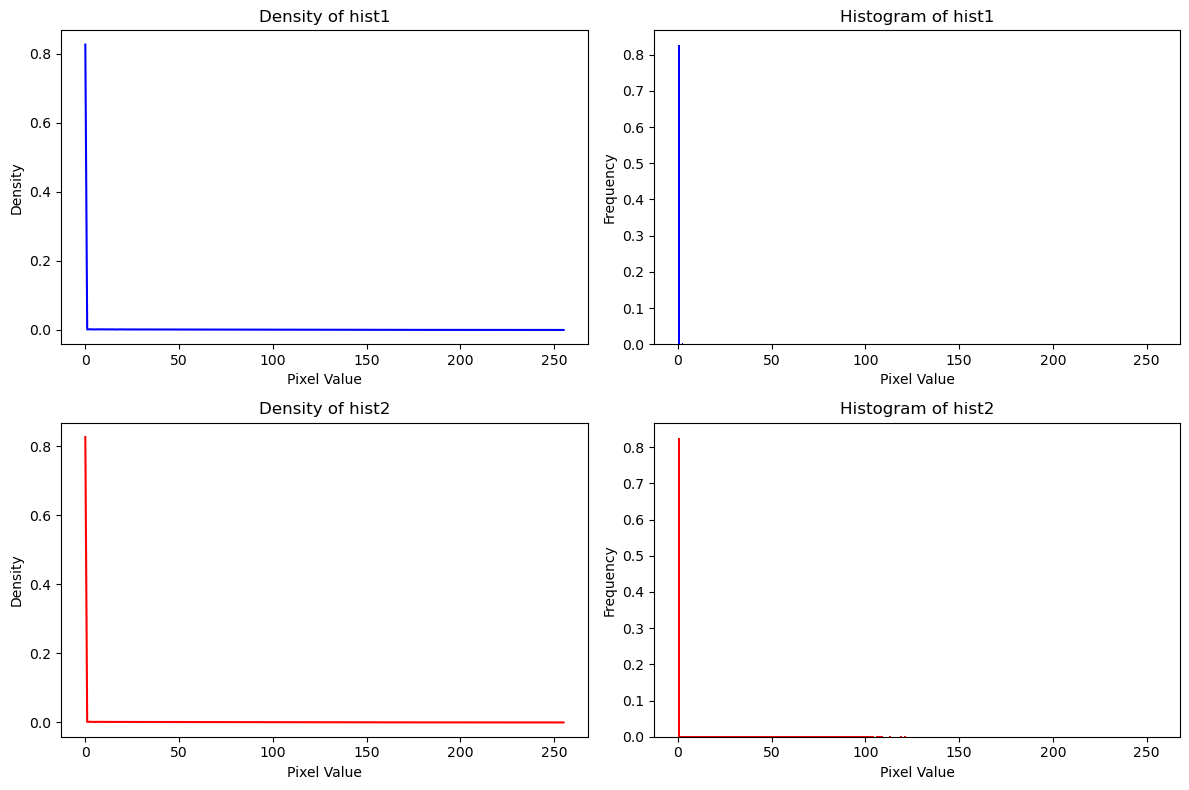

Done.
Finding Probability Distribution of Features.


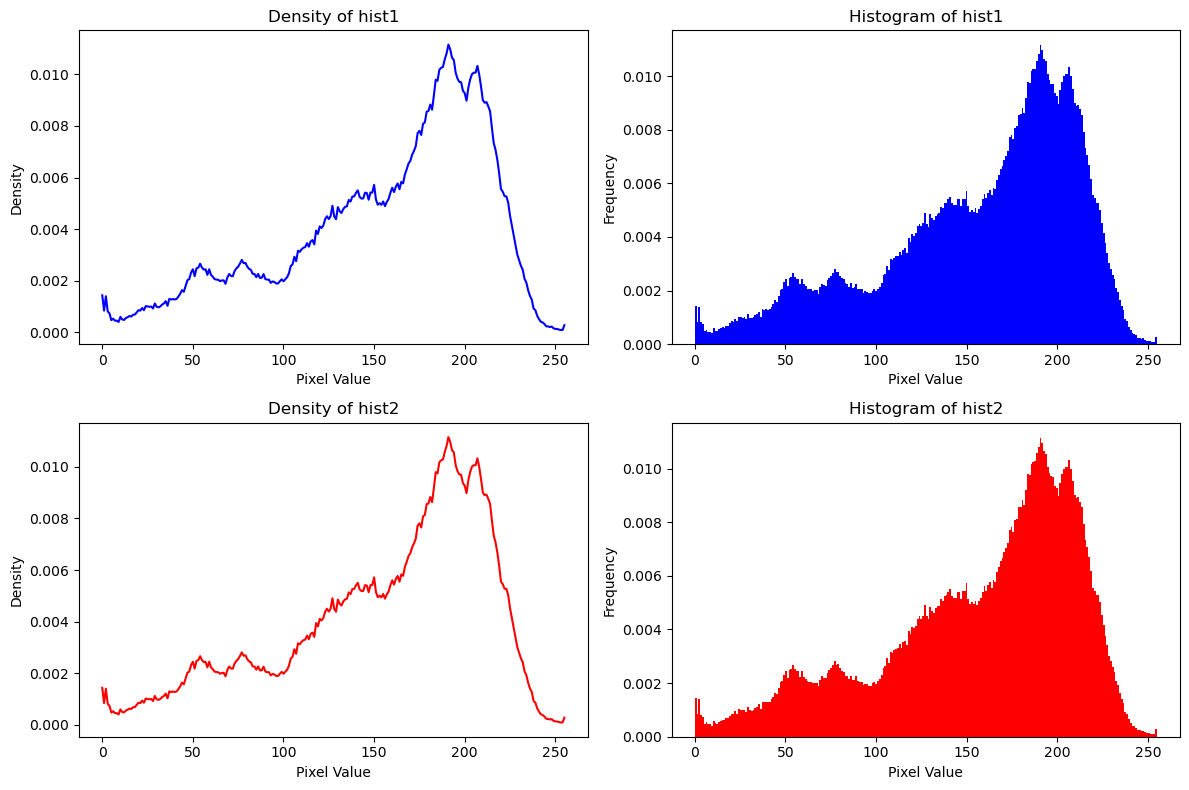

Done.
Finding KL Loss.
 image1,differs from another distribution, imag2: 0.0


 imag2,differs from another distribution, image1: 0.0


KL Loss: 0.0


In [22]:
cl.kl()